In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

C:\Users\farou\AppData\Local\Temp\ipykernel_13612\2839908962.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


c:\Users\farou\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


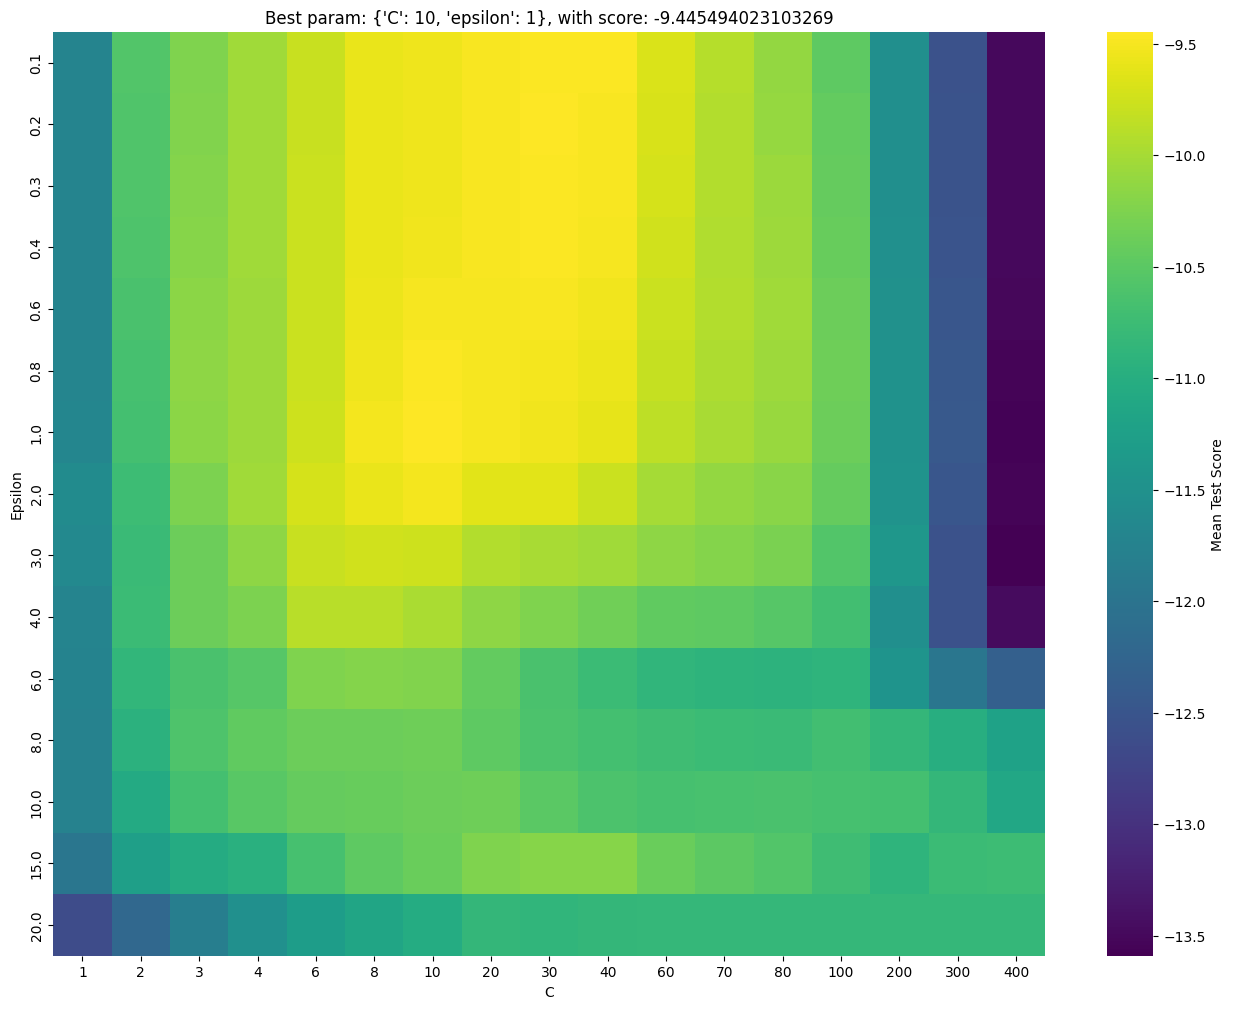

Best hyperparameters: {'C': 10, 'epsilon': 1}
With Score: -9.445494023103269


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_sample = 'model.csv'

# Read the CSV file into a pandas DataFrame with specified column names
df = pd.read_csv(csv_sample)


X = pd.DataFrame([df["F1"],df["F2"],df["F3"],df["F4"]]).transpose()
y = df["Manual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the SVR model
svr = SVR(kernel='rbf')
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [1,2,3,4,6,8,10,20,30,40,60,70,80,100,200,300,400], 'epsilon': [0.1,0.2,0.3,0.4,0.6,0.8,1,2,3,4,6,8,10,15,20]}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title(f"Best param: {grid_search.best_params_}, with score: {grid_search.best_score_}")
plt.xlabel('C')
plt.ylabel('Epsilon')
#plt.savefig("model_result.jpg")
plt.show()
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("With Score:", grid_search.best_score_)




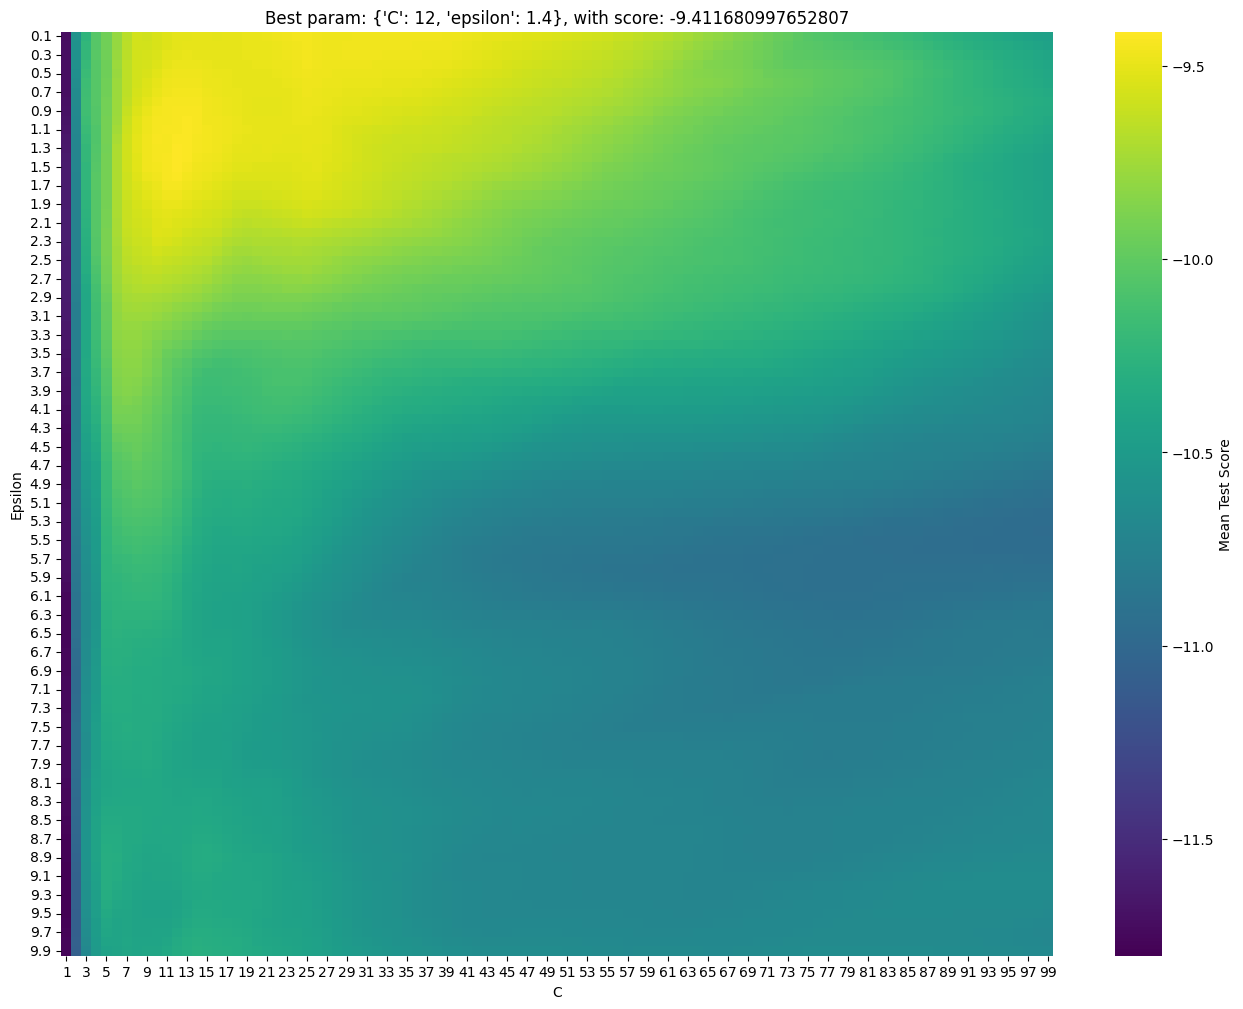

Best hyperparameters: {'C': 12, 'epsilon': 1.4}
With Score: -9.411680997652807


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_sample = 'model.csv'

# Read the CSV file into a pandas DataFrame with specified column names
df = pd.read_csv(csv_sample)


X = pd.DataFrame([df["F1"],df["F2"],df["F3"],df["F4"]]).transpose()
y = df["Manual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the SVR model
svr = SVR(kernel='rbf')
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': np.round(np.arange(1, 100, 1),1), 'epsilon': np.round(np.arange(0.1, 10, 0.1),1)}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title(f"Best param: {grid_search.best_params_}, with score: {grid_search.best_score_}")
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.savefig("model2.jpg")
plt.show()
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("With Score:", grid_search.best_score_)

In [5]:
# Specify the path to your CSV file
test_sample = 'test_data.csv'

# Read the CSV file into a pandas DataFrame with specified column names
sf = pd.read_csv(test_sample)


ts = pd.DataFrame([sf["F1"],sf["F2"],sf["F3"],sf["F4"]]).transpose()
model = grid_search.best_estimator_
joblib.dump(model, 'model2.jpg')
load_model = joblib.load('model2.jpg')

estimated = load_model.predict(ts)
print(estimated)

[ 8.65528314 45.43918272 46.08970968 23.43231641 40.53565662 47.42249598
 47.47678731 38.1440428  46.21559825 41.04593712 41.83111664 28.54165483
 34.37398322 41.58191348 42.48698807 25.88427547 42.29904725 45.0723255
 31.76637482 18.06900651 45.0322737  36.98099366 47.02207688 41.68082103
 34.86409073 13.20755757 21.59039848 16.11464047 48.78358782 22.44814234
 19.48966481 46.43747262 37.64087997 31.39261165 48.03851055 26.20441159]


In [6]:
#array to column pandas dataframe
df_estimated=pd.DataFrame(estimated, columns=['estimasi'])
print (df_estimated)

     estimasi
0    8.655283
1   45.439183
2   46.089710
3   23.432316
4   40.535657
5   47.422496
6   47.476787
7   38.144043
8   46.215598
9   41.045937
10  41.831117
11  28.541655
12  34.373983
13  41.581913
14  42.486988
15  25.884275
16  42.299047
17  45.072326
18  31.766375
19  18.069007
20  45.032274
21  36.980994
22  47.022077
23  41.680821
24  34.864091
25  13.207558
26  21.590398
27  16.114640
28  48.783588
29  22.448142
30  19.489665
31  46.437473
32  37.640880
33  31.392612
34  48.038511
35  26.204412


In [7]:
csv_data=pd.read_csv('model.csv')
csv_data['estimasi'] = ""
csv_data['estimasi'] = df_estimated['estimasi']
csv_data

,F1,F2,F3,F4,Manual,estimasi
0,8,8,7,8,9,8.655283
1,6,8,6,5,10,45.439183
2,11,15,14,5,16,46.089710
3,3,4,3,1,4,23.432316
4,8,11,13,10,21,40.535657
...,...,...,...,...,...,...
76,16,9,10,16,54,NaN
77,16,9,15,13,55,NaN
78,8,12,10,11,49,NaN
79,14,13,10,13,60,NaN


In [8]:
csv_data.to_csv('model_test.csv', index=False)

C:\Users\farou\AppData\Local\Temp\ipykernel_5668\300659603.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


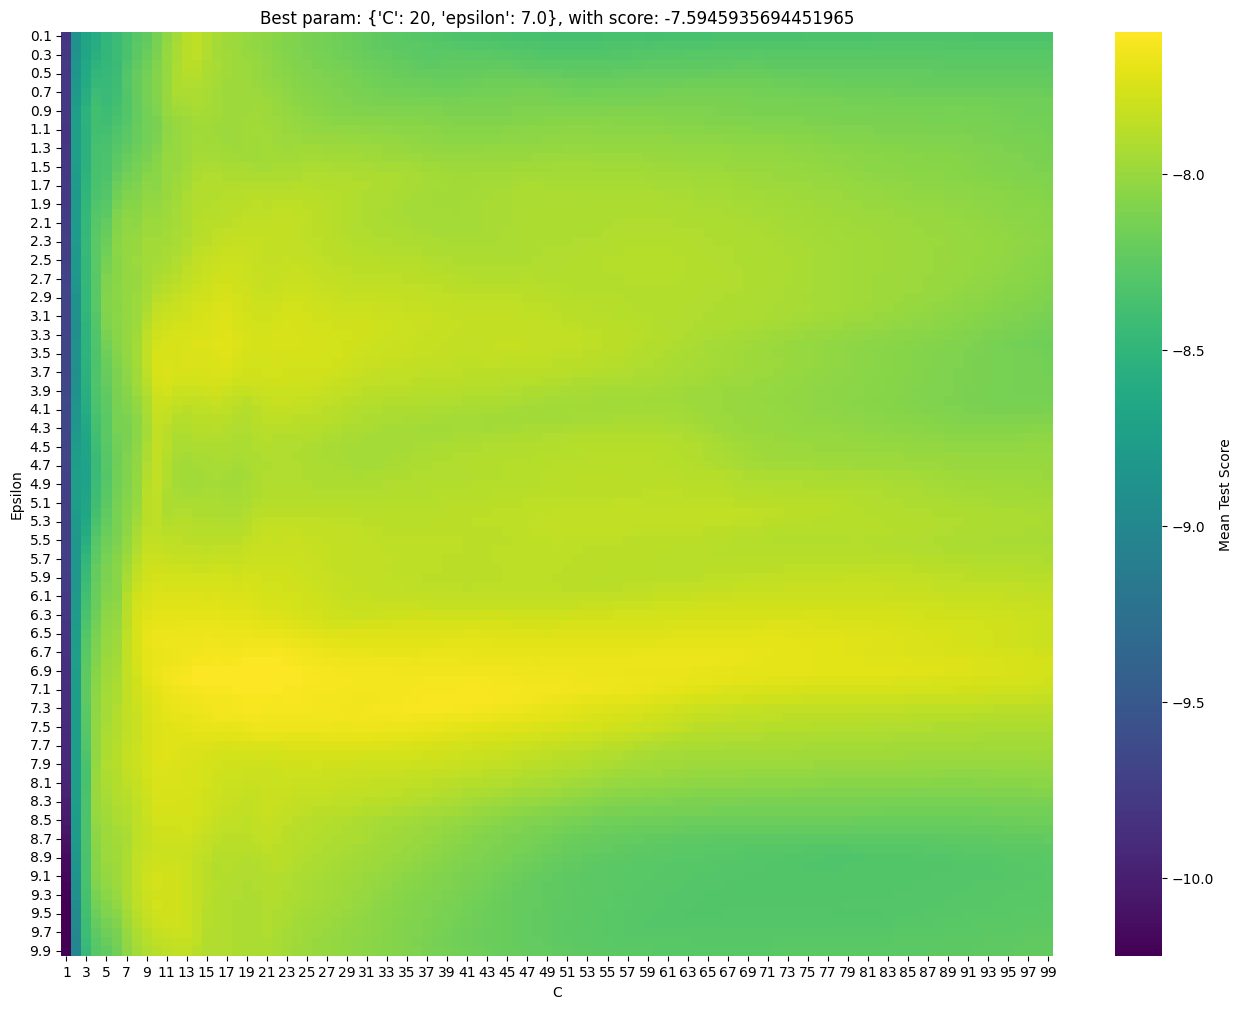

Best hyperparameters: {'C': 20, 'epsilon': 7.0}
With Score: -7.5945935694451965


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_sample = 'Training_model_svr.csv'

# Read the CSV file into a pandas DataFrame with specified column names
df = pd.read_csv(csv_sample)


X = pd.DataFrame([df["F1"],df["F2"],df["F3"],df["F4"]]).transpose()
y = df["Manual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the SVR model
svr = SVR(kernel='rbf')
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': np.round(np.arange(1, 100, 1),1), 'epsilon': np.round(np.arange(0.1, 10, 0.1),1)}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title(f"Best param: {grid_search.best_params_}, with score: {grid_search.best_score_}")
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.savefig("Model_SVR_Baru.jpg")
plt.show()
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("With Score:", grid_search.best_score_)

In [7]:
# Specify the path to your CSV file
test_sample = 'Data_test_svr_baru.csv'

# Read the CSV file into a pandas DataFrame with specified column names
sf = pd.read_csv(test_sample)


ts = pd.DataFrame([sf["F1"],sf["F2"],sf["F3"],sf["F4"]]).transpose()
model = grid_search.best_estimator_
joblib.dump(model, 'Model_SVR_Baru.jpg')
load_model = joblib.load('Model_SVR_Baru.jpg')

estimated = load_model.predict(ts)
print(estimated)

df_estimated=pd.DataFrame(estimated, columns=['estimasi'])

csv_data=pd.read_csv('Data_test_svr_baru.csv')
csv_data['estimasi'] = ""
csv_data['estimasi'] = df_estimated['estimasi']
csv_data


[12.8976423  42.14588651 49.58568235 40.73177371 38.40040789 51.08304763
 45.03846803 40.5680127  47.41686276 41.07778806 37.48708431 45.2061929
 37.47789596 45.14722179 48.35305887 21.7801428  42.78557239 52.51847109
 42.14737604 16.5189573  33.36106667 39.99632417 40.5410527  41.07869125
 34.80426973 17.27306445 31.80773097 28.77000732 50.4782027  23.08570384
 23.68087883 52.71893184 48.48791108 28.203266   43.15668032 31.90493294]


,F1,F2,F3,F4,Manual,estimasi
0,4,6,5,3,6,12.897642
1,24,22,19,35,51,42.145887
2,25,28,30,36,34,49.585682
3,30,21,17,21,21,40.731774
4,21,12,29,24,32,38.400408
5,31,22,33,30,51,51.083048
6,33,24,24,39,40,45.038468
7,31,18,18,21,38,40.568013
8,31,31,23,34,52,47.416863
9,30,21,33,19,32,41.077788


In [10]:
csv_data.to_csv('SVR_test_result.csv', index=False)

c:\Users\farou\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


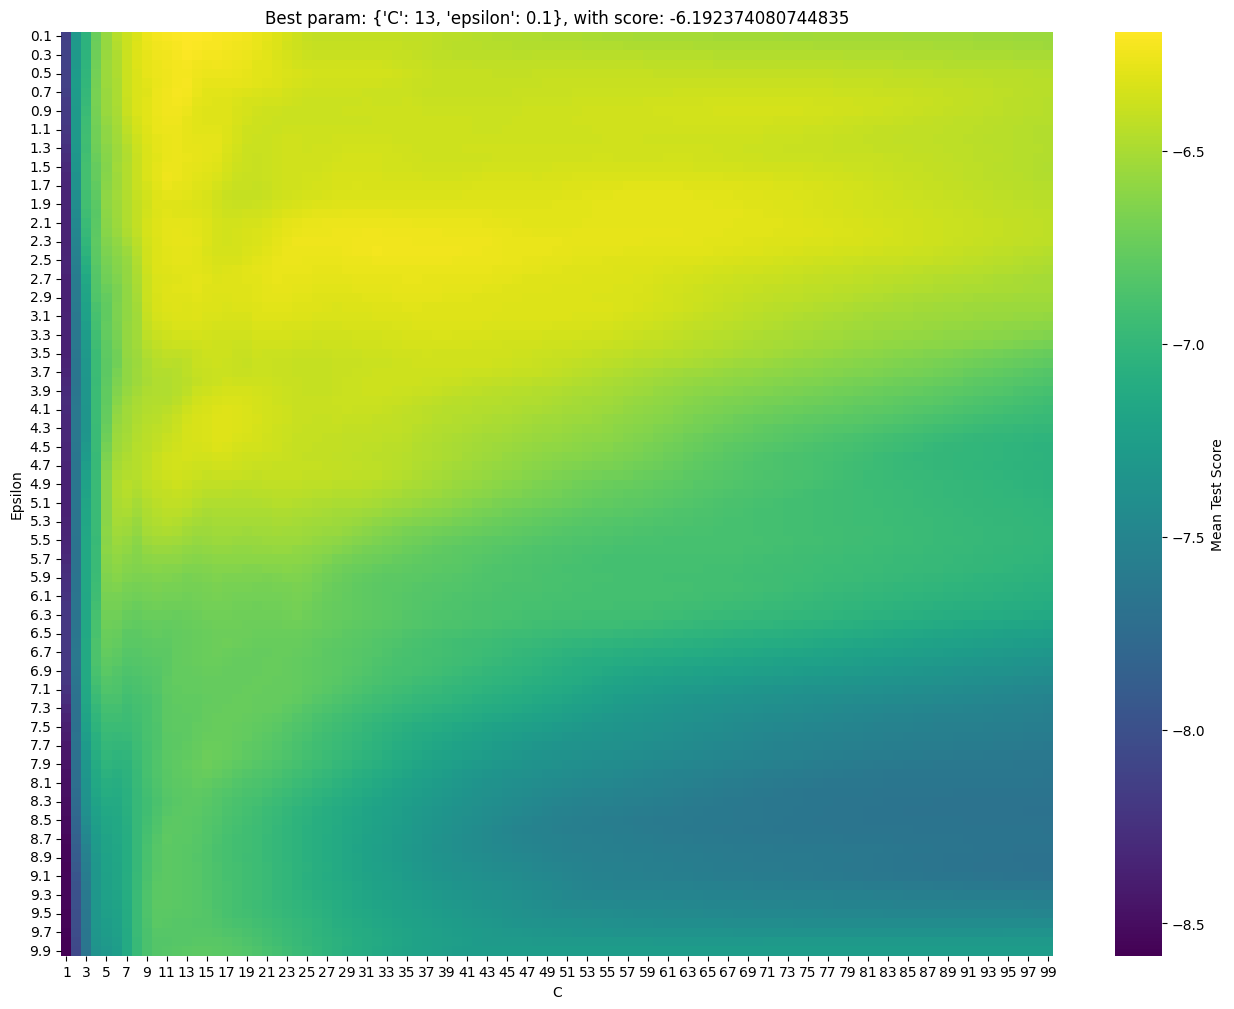

Best hyperparameters: {'C': 13, 'epsilon': 0.1}
With Score: -6.192374080744835


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_sample = 'Training_model_svr_3_4input.csv'

# Read the CSV file into a pandas DataFrame with specified column names
df = pd.read_csv(csv_sample)


X = pd.DataFrame([df["F1"],df["F2"],df["F3"],df["F4"]]).transpose()
y = df["Manual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the SVR model
svr = SVR(kernel='rbf')
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': np.round(np.arange(1, 100, 1),1), 'epsilon': np.round(np.arange(0.1, 10, 0.1),1)}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title(f"Best param: {grid_search.best_params_}, with score: {grid_search.best_score_}")
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.savefig("Model_SVR_Baru3_4input.jpg")
plt.show()
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("With Score:", grid_search.best_score_)

c:\Users\farou\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


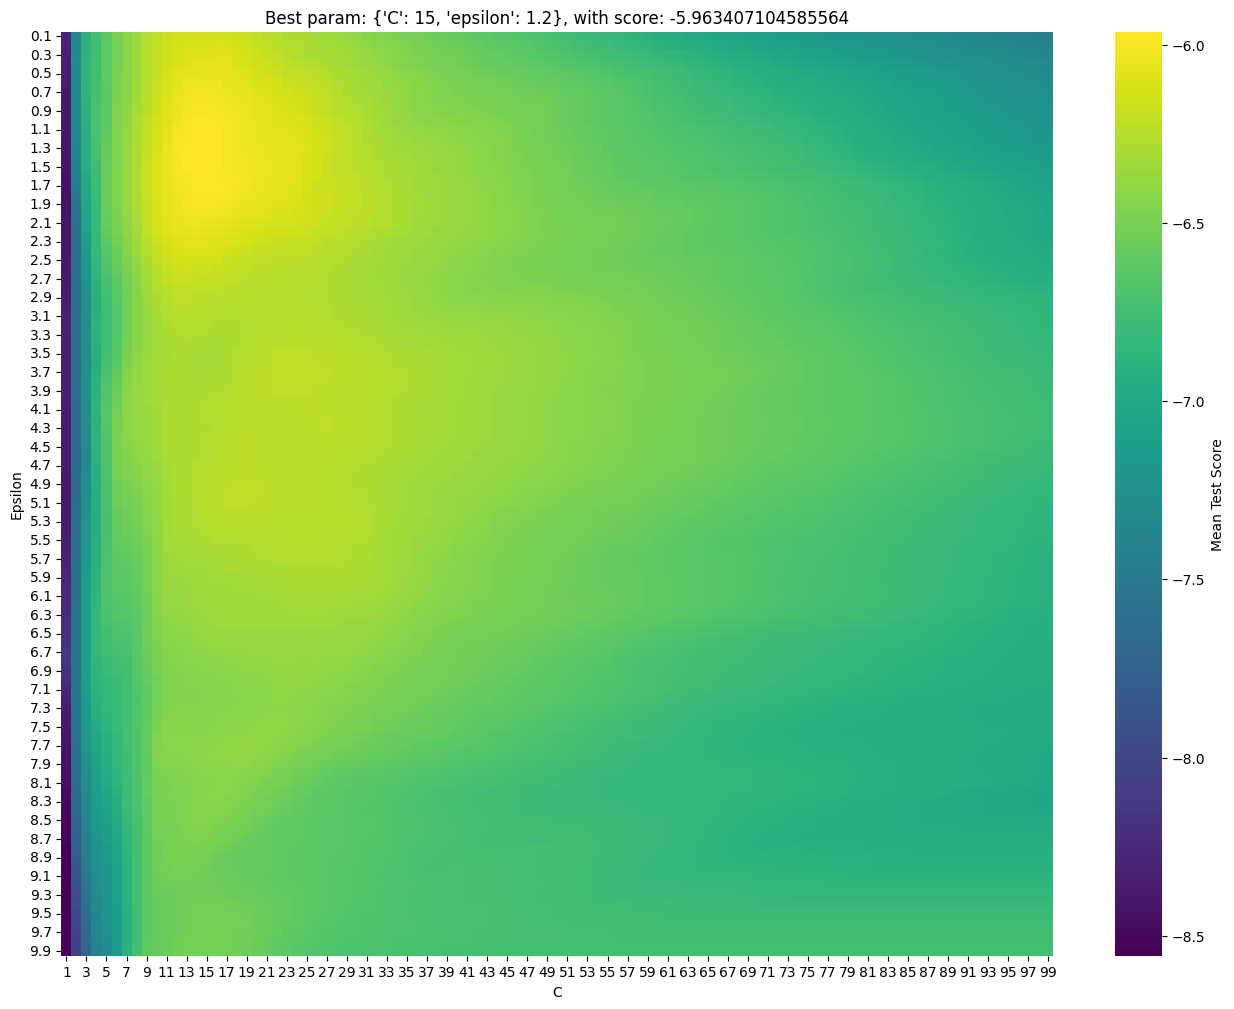

Best hyperparameters: {'C': 15, 'epsilon': 1.2}
With Score: -5.963407104585564


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_sample = 'Training_model_svr_3.csv'

# Read the CSV file into a pandas DataFrame with specified column names
df = pd.read_csv(csv_sample)


X = pd.DataFrame([df["F1"],df["F2"],df["F3"],df["F4"],df["FD1"],df["FD2"],df["FD3"],df["FD4"]]).transpose()
y = df["Manual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the SVR model
svr = SVR(kernel='rbf')
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': np.round(np.arange(1, 100, 1),1), 'epsilon': np.round(np.arange(0.1, 10, 0.1),1)}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the results as a Pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results for heatmap
heatmap_data = results.pivot(index='param_epsilon', columns='param_C', values='mean_test_score')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
plt.title(f"Best param: {grid_search.best_params_}, with score: {grid_search.best_score_}")
plt.xlabel('C')
plt.ylabel('Epsilon')
plt.savefig("Model_SVR_Baru3.jpg")
plt.show()
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("With Score:", grid_search.best_score_)

In [24]:
#Test SVR 4 input
# Specify the path to your CSV file
test_sample = 'testSVR4feb.csv'

# Read the CSV file into a pandas DataFrame with specified column names
sf = pd.read_csv(test_sample)


ts = pd.DataFrame([sf["F1"],sf["F2"],sf["F3"],sf["F4"]]).transpose()
model = grid_search.best_estimator_
joblib.dump(model, 'model2.jpg')
load_model = joblib.load('model2.jpg')

estimated = load_model.predict(ts)
print(estimated)

df_estimated=pd.DataFrame(estimated, columns=['estimasi'])

csv_data=pd.read_csv('testSVR4feb.csv')
csv_data['estimasi'] = ""
csv_data['estimasi'] = df_estimated['estimasi']
csv_data
csv_data.to_csv('testSVR4feb_result.csv', index=False)

[15.98538775 31.39416931 33.9594857  41.37481438 41.87720124 33.08073958
 31.52148381 31.31259253 31.35403476 31.36853608 31.77323796 42.54479888
 43.71777105 41.96206096 36.75898822 43.43284635 32.31823544 31.32095932
 46.02244027 38.09182789 37.32545446 42.75570491 35.49849925 42.80194864
 48.76226336 23.93635116 37.99535008 32.95755687 34.34000466 33.55284227
 35.81412453 36.79589265 31.53243478 43.5079318  31.94032253 45.77454422]


In [21]:
#Test SVR
# Specify the path to your CSV file
test_sample = 'Data_test_svr_3.csv'

# Read the CSV file into a pandas DataFrame with specified column names
sf = pd.read_csv(test_sample)


ts = pd.DataFrame([sf["F1"],sf["F2"],sf["F3"],sf["F4"],sf["FD1"],sf["FD2"],sf["FD3"],sf["FD4"]]).transpose()
model = grid_search.best_estimator_
joblib.dump(model, 'Model_SVR_Baru3.jpg')
load_model = joblib.load('Model_SVR_Baru3.jpg')

estimated = load_model.predict(ts)
print(estimated)

df_estimated=pd.DataFrame(estimated, columns=['estimasi'])

csv_data=pd.read_csv('Data_test_svr_3.csv')
csv_data['estimasi'] = ""
csv_data['estimasi'] = df_estimated['estimasi']
csv_data
csv_data.to_csv('SVR_test_result3.csv', index=False)

[32.1702437  25.34047039 19.10946121 33.37910634 39.31386399 36.04008429
 29.92316782 11.97794619 31.88060413 27.19420855 43.69287841 12.49073341
 28.23887619 32.64877408 47.88391018 34.30385699 40.5454941  45.41761194
 32.51115042 42.54682537 37.39661828 40.15157469 31.86792668 36.44830382
 40.53388125 43.73848133 38.28605823 31.95516788 35.54561256 39.59097983
 36.80728941 38.6503935  35.90778351 29.14498298 40.82053111 43.56947445
 12.00925947 24.74007071 33.05402766 42.1005649  35.37266042 34.87358003
 25.31650423 35.82766721 45.52348941]


In [20]:
#create Dummy
import numpy as np
import pandas as pd

# Load your existing data (F1-F4 and actual column)
data_with_actual = pd.read_csv("Data_test_svr_3.csv").values  # Replace with actual file path

F1_F4 = data_with_actual[:, :4]
actual_values = data_with_actual[:, 4]

# Generate new dummy data with values increasing by 1 to 8 but not exceeding actual
new_data = np.copy(F1_F4)

for i in range(F1_F4.shape[0]):
    for j in range(F1_F4.shape[1]):
        max_increment = actual_values[i] - F1_F4[i, j]
        if max_increment > 0:
            new_data[i, j] += np.random.randint(1, min(6, max_increment + 1))

# Save to CSV
df_new = pd.DataFrame(new_data, columns=["F1", "F2", "F3", "F4"])
df_new.to_csv("new_dummy3.csv", index=False)

print("New dummy data saved as new_dummy3.csv")

New dummy data saved as new_dummy3.csv
